<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/03-analisis-univariante-causal-multivariante/03_C___Introducci%C3%B3n_analisis_causal_sin_resolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 INTRO: Análisis Causal 
El análisis causal trata de encontrar las relaciones causales (no solo asociaciones) entre las variables.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1WNWGnLUyiGqwFf92V3V_szu3QTD_0EQY5GZjhFgen5Q/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/03-analisis-univariante-causal-multivariante/03_C___Introducci%C3%B3n_analisis_causal.ipynb)




## 0101 Qué es un análisis univariante?
El análisis univariante consiste en estudiar la distribución y características de una sola variable.

Veamos con ejemplos:

## 0102 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)): pandas, numpy, seaborn, matplotlib.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0103 Carga el dataset Fifa19
Para probar a hacer análisis univariantes utilizaremos el dataframe con datos ya limpios del fifa 19 ([aquí](https://drive.google.com/file/d/1P0sQHp1bPiKbL-MSr7FndJRgowvOLdjU/view?usp=sharing) está mi archivo ya limpio). Importa este dataset en un dataframe llamado **df_fifa19**.

Utiliza solo las columnas cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 
        'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 
        'Release Clause_€', 'Preferred Foot', 'Position', 'SprintSpeed'] y en este orden.

In [105]:
cols = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 
        'Height_cm', 'Weight_kg', 'Value_€', 'Wage_€', 
        'Release Clause_€', 'Preferred Foot', 'Position', 'SprintSpeed']

# Url
url = "https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Fifa19_Clean.csv"

# Importamos el archivos usando read_csv()
df_fifa19 = pd.read_csv(url, usecols=cols)
df_fifa19.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Position,SprintSpeed,Weight_kg,Value_€,Wage_€,Release Clause_€,Height_cm
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,RF,86.0,72.121128,110500000.0,565000.0,226500000.0,170.18
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,ST,91.0,83.007336,77000000.0,405000.0,127100000.0,187.96
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,LW,90.0,68.038800,118500000.0,290000.0,228100000.0,175.26


# 02 Azar
El azar puede ser la fuente de una correlación.

Imaginémonos dos monedas de 1€. Una es de Pepe, y la otra de Carmen. Se ponen de acuerdo y tiran sus respectivas monedas 10 veces. Anotan un 1 si sale cara, un 0 si sale cruz.  

## 0201 Probabilidad de correlación
Qué probabilidad hay de que (solo por azar) obtengan una correlación entre ambas monedas mayor a [0.5]?

In [106]:
# Definimos una moneda
moneda = pd.Series([0,1])
moneda

0    0
1    1
dtype: int64

In [107]:
# Ejemplo de tirada
moneda.sample(10, replace=True).reset_index(drop=True)

0    0
1    1
2    1
3    0
4    1
5    1
6    1
7    0
8    1
9    0
dtype: int64

In [108]:
#Experimento
# Primero generamos una variable donde guardaremos los valores de la correlación
correlacion = []

# Empezamos experimento 
for n_experimento in range(10000):
  tirada_pepe = moneda.sample(10, replace=True).reset_index(drop=True)
  tirada_carmen = moneda.sample(10, replace=True).reset_index(drop=True)
  correlacion.append(tirada_pepe.corr(tirada_carmen))

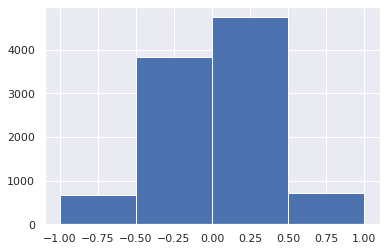

In [109]:
# Visualizamos la distribución de correlación
plt.hist(correlacion, bins=[-1, -0.5, 0, 0.5, 1])
plt.show()

In [110]:
(np.abs(correlacion)>=0.5).sum() / len(correlacion)

0.1398

## 0202 Y si tiran la moneda 20 veces? y 100?
La probabilidad de que el azar sea el causante de una correlación disminuye cuando el tamaño de la muestra es mayor (es decir, cuando tiran la moneda más veces).

In [111]:
# EXPERIMENTO
# Inicializamos un dataframe para guardar los resultados
df_resultados = pd.DataFrame()

# Probamos para distintos números de veces que se tiran la moneda
for n_tiradas in [5, 10, 20, 50, 100]:

  # Primero generamos una variable donde guardaremos los valores de la correlación
  correlacion = []

  # Empezamos experimento 
  for n_experimento in range(10000):
    tirada_pepe = moneda.sample(n_tiradas, replace=True).reset_index(drop=True)
    tirada_carmen = moneda.sample(n_tiradas, replace=True).reset_index(drop=True)
    correlacion.append(tirada_pepe.corr(tirada_carmen))
  
  # Guardamos el resultado en el dataframe
  df_resultados[str(n_tiradas)+'_tiradas'] = correlacion

In [112]:
df_resultados.head()

,5_tiradas,10_tiradas,20_tiradas,50_tiradas,100_tiradas
0,-0.666667,-8.908708e-02,1.919192e-01,-0.003213,-0.046506
1,0.666667,2.000000e-01,1.308410e-17,0.244177,0.060012
2,-0.408248,-2.266233e-17,2.041241e-01,-0.196778,-0.143516
3,-0.166667,2.721655e-01,3.750000e-01,0.003213,0.304662
4,-0.408248,-2.182179e-01,3.898194e-01,-0.079420,-0.118389


In [113]:
filtro_interes = df_resultados.abs()>=0.5
filtro_interes.sum()/len(df_resultados)

5_tiradas      0.3322
10_tiradas     0.1459
20_tiradas     0.0307
50_tiradas     0.0005
100_tiradas    0.0000
dtype: float64

# 03 Relación causal directa
No hay métodos estadísticos que nos permitan saber si la relación entre dos variables es causal. Sólo conocimiento sobre el sistema que genera los datos nos permitirá hacer este tipo de juicios.

Lo que sí podemos calcular es la fortaleza de la asociación entre las variables, como hemos visto en el [notebook de análisis bivariantes](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/03-analisis-univariante-causal-multivariante/03_B___Analisis_multivariante.ipynb). Por ejemplo, podríamos utilizar la función desarrollada en el [EJERCICIO 5](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/EJERCICIO_5___EDA_Visual_Funcion_Scatter.ipynb).


In [114]:
# FUNCIÓN EJERCICIO 5
def evaluacion_correlacion(vector_x, nombre_x, vector_y, nombre_y):
  # Estilo seaborn
  sns.set()

  # Tamaño de 7.7 x 7.5
  plt.figure(figsize=(7.5, 7.5))

  # DIAGRAMA DE DISPERSIÓN
  # Simplemente utilizamos plt.scatter()
  plt.scatter(vector_x, 
              vector_y, 
              alpha = 0.05)
  
  # COEFICIENTE DE CORRELACIÓN
  # Calculamos el coeficiente pearson redondeando a dos cifras (0.XX) ... 
  # ... y lo guardamos en formato texto (str)
  corr_formato_texto = str(round(np.corrcoef(vector_x, vector_y)[0,1],2))

  # Calculamos las coordenadas donde posicionar el texto (en el medio del gráfico)
  coordenada_x = vector_x.min() + (vector_x.max()-vector_x.min())/2
  coordenada_y = vector_y.min() + (vector_y.max()-vector_y.min())/2
  
  # Utilizamos la función plt.text() 
  plt.text(s = corr_formato_texto, 
           x = coordenada_x, 
           y = coordenada_y,
           fontsize=150, 
           horizontalalignment='center',
           verticalalignment='center', 
           color = 'white', 
           alpha = 0.85)
  
  # Añadimos detalles a la imagen
  plt.ylabel(nombre_y)
  plt.xlabel(nombre_x)
  plt.title('CORRELACIÓN ' + nombre_x + ' VS ' + nombre_y,
            fontsize = 15)
  plt.show()

# 04 Presencia de confounders
La presencia de confounders puede hacer que la asociación que observamos entre dos variables no sea la que corresponde a su relación directa.

## EJEMPLO
Caso real! (Con nombres y cifras modificados por privacidad).

Mi jefa Pepa tiene una reunión inminente con Xiaomi. Quiere conseguir que financien parte de los anuncios publicitarios de Orange. Su lógica es que las nuevas altas de clientes Orange están correlacionadas con las ventas de Orange de terminales. Al ser Xiaomi un partner estratégico de Orange, si nos ayudan a conseguir clientes ellos aumentarán sus ventas.

Esa es la hipótesis de mi jefa. Me pide que la sustente con cifras.

Os voy a enseñar cómo afronté el problema pero no puedo compartir con vosotros los datos.

## EJERCICIO 1
Cuál es la influencia del nivel fubolístico sobre el valor del futbolista? 

Ver el diagrama causal propuesto:
https://docs.google.com/presentation/d/1jYSOQpCVbL7JdacYhq8NuKWwhYe2QwW8qvM680GERps/edit#slide=id.gbc327d14bd_0_11

La variable edad es un confounder: afecta tanto al nivel futbolistico actual como al valor.

In [115]:
# Utilizaremos este dataframe
df_valor = df_fifa19[['Name','Value_€','Overall','Age']]
df_valor.head()

,Name,Value_€,Overall,Age
0,L. Messi,110500000.0,94,31
1,Cristiano Ronaldo,77000000.0,94,33
2,Neymar Jr,118500000.0,92,26
3,De Gea,72000000.0,91,27
4,K. De Bruyne,102000000.0,91,27


Primero muestra la asociación entre las 3 variables con con sns.pairplot() y la visualización de la matriz de los coeficientes de Pearson.

In [116]:
# Utiliza sns.pairplot() como hemos visto en el notebook 3B (análisis bivariante)


In [117]:
# Visualización coeficientes Pearson


Vamos a centrarnos ahora en los futbolistas que tienen una misma edad. Por ejemplo, vamos a centrarnos en aquellos que tienen 25 años.

In [118]:
# Creamos un filtro que se quede con los futbolistas de 25 años


Ahora vuelve a mostrar las distribuciones y asociaciones, pero sólo para este grupo de futbolistas.

In [119]:
# Vuelve a utilizar sns.pairplot() para los futbolistas de 25 años


In [120]:
# Visualización coeficientes Pearson para los futbolistas de 25 años


Genera un loop que evalúe la relación entre el nivel futbolístico y el valor para cada edad (entre 25 y 35 años) utilizando la función evaluacion_correlacion().

In [121]:
# Iniciamos el loop
for edad in [25,26,27,28,29,30,31,32,33,34,35]:
  # Filtro edad
  ...
  # Utiliza la función evaluacion_correlacion
  ...

# 05 Ajuste por collider
Ajustar a (quedarnos con ciertos valores de) un collider (causa común a dos variables) puede modificar la asociación que vemos entre esas dos variables.

## EJERCICIO 2
Queremos entender la influencia de la edad sobre el nivel futbolístico.

Link al diagrama causal: https://docs.google.com/presentation/d/1jYSOQpCVbL7JdacYhq8NuKWwhYe2QwW8qvM680GERps/edit#slide=id.gbc327d14bd_1_6

Primero, visualiza la relación entre ambas.

In [122]:
# Puedes utilizar la funcion evaluacion_correlacion


Ahora visualiza la misma relación entre variables pero sólo de aquellos jugadores con un valor mediano. Para esto, calcula el percentil 44 y 55 de la columna valor y crea un filtro que se quede con solo con los jugadores cuyo valor este entre ambos.

In [123]:
# Generamos el filtro de valor mediano
valor_min = df_valor['Value_€'].quantile(0.45)
valor_max = df_valor['Value_€'].quantile(0.55)

filtro_medianos = ((df_valor['Value_€'] >= valor_min)&
                   (df_valor['Value_€'] <= valor_max))

In [124]:
# Vuelve a utilizar la función evaluacion_correlacion sólo para los futbolistas de valor mediano


## Por qué varía tanto, que explicación tiene?